In [1]:
# Matlab plots inline
%matplotlib inline

# Auto reload external files after changes
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from image_set import ImgSet
from image_process import ZernikeProc
import zernike as zn

Loading SHTOOLS documentation


In [3]:
ant_set = ImgSet(name='trees_hr', data_folder='../data/world_images', force_cache=True)
ant_set.M.shape

Loading cache file: ../data/world_images/trees_hr.npz


(37440, 40401)

In [4]:
ant_set_w = ImgSet(name='trees_hr_w', data_folder='../data/world_images')
ant_processed = ZernikeProc(ant_set_w)

loading from image files in ../data/world_images/trees_hr_w
loading from matrix
Loading cache file: ../data/world_images/trees_hr_w_zernikem.npz


In [5]:
A = ant_set.M.reshape(104, 360, -1)
A.shape

(104, 360, 40401)

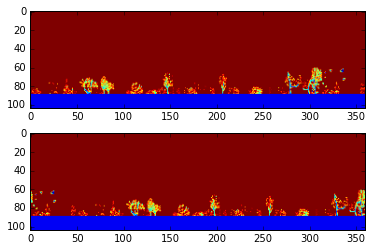

In [6]:
fig, ax = plt.subplots(2,1)

ax[0].imshow(A[:,:,100])
ax[1].imshow(np.roll(A, 50, axis=1)[:,:,100])

In [7]:
def random_direction(M):
    """Takes a 3d array of images and returns new 3d array where each image is randomly rolled on x axis."""
    rows, cols, images = np.ogrid[:M.shape[0], :M.shape[1], :M.shape[2]]
    
    r = np.random.randint(M.shape[1], size=M.shape[2])
    R = np.tile(r, (M.shape[0],1))
    
    cols = cols - R[:,np.newaxis]
    M_rotated = M[rows, cols, images]
    
    return M_rotated

In [8]:
B = random_direction(A)

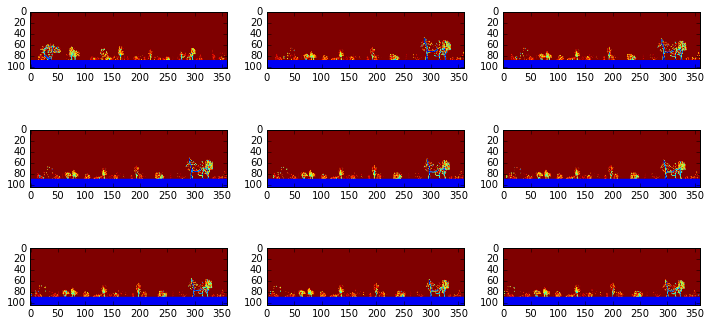

In [9]:
fig, ax = plt.subplots(3,3, figsize=(12,6))

for i in range(9):
    ax[i/3][i%3].imshow(A[:,:,i*1000])

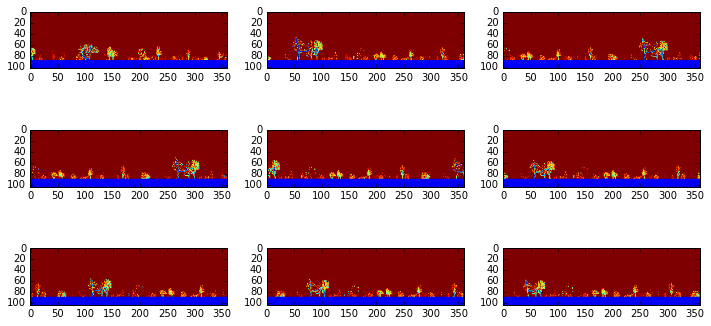

In [10]:
fig, ax = plt.subplots(3,3, figsize=(12,6))

for i in range(9):
    ax[i/3][i%3].imshow(B[:,:,i*1000])

In [11]:
M2 = B.reshape(-1, A.shape[2])

Loading cache file: data/trees_hr_random.npz


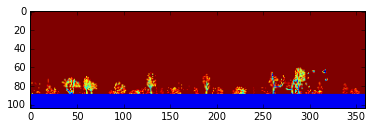

In [12]:
#rotated_set = ImgSet(name='trees_hr_random', M=M2, w=A.shape[1], h=A.shape[0])
#rotated_set.save()

rotated_set = ImgSet(name='trees_hr_random')
plt.imshow(rotated_set[500])

In [13]:
def cart2polar(x, y):
    phi = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return theta, phi

def wrap_images(M, h, w):
    
    M_wrapped = np.empty([h*2 * h*2, M.shape[1]])
    
    x_range = np.linspace (-1, 1, h*2) # We make the radius of our plot the same as the height of current images.
    xx, yy = np.meshgrid(x_range, x_range)
    theta, phi = cart2polar(xx, yy)
    theta = (theta / np.max(theta) + 1) * (w-1)/2
    phi = phi * (h-1)
    coords = np.vstack((theta.flatten(), phi.flatten()))

    for i, image in enumerate(rotated_set):
        I_wrapped = sp.ndimage.map_coordinates(image.T, coords, order=1).reshape((h*2, h*2))
        M_wrapped[:, i] = I_wrapped.reshape(-1)
        
    return M_wrapped

In [14]:
#M_wrapped = wrap_images(rotated_set.M, rotated_set.h, rotated_set.w)

In [15]:
#rotated_w_set = ImgSet(name='trees_hr_random_w', M=M_wrapped, w=rotated_set.h*2, h=rotated_set.h*2)
#rotated_w_set.save()

rotated_w_set = ImgSet(name='trees_hr_random_w')

Loading cache file: data/trees_hr_random_w.npz


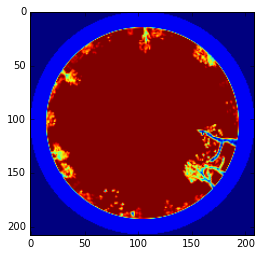

In [16]:
plt.imshow(rotated_w_set[3000])

In [17]:
rotated_w_processed = ZernikeProc(rotated_w_set)

loading from matrix
Loading cache file: data/trees_hr_random_w_zernikem.npz


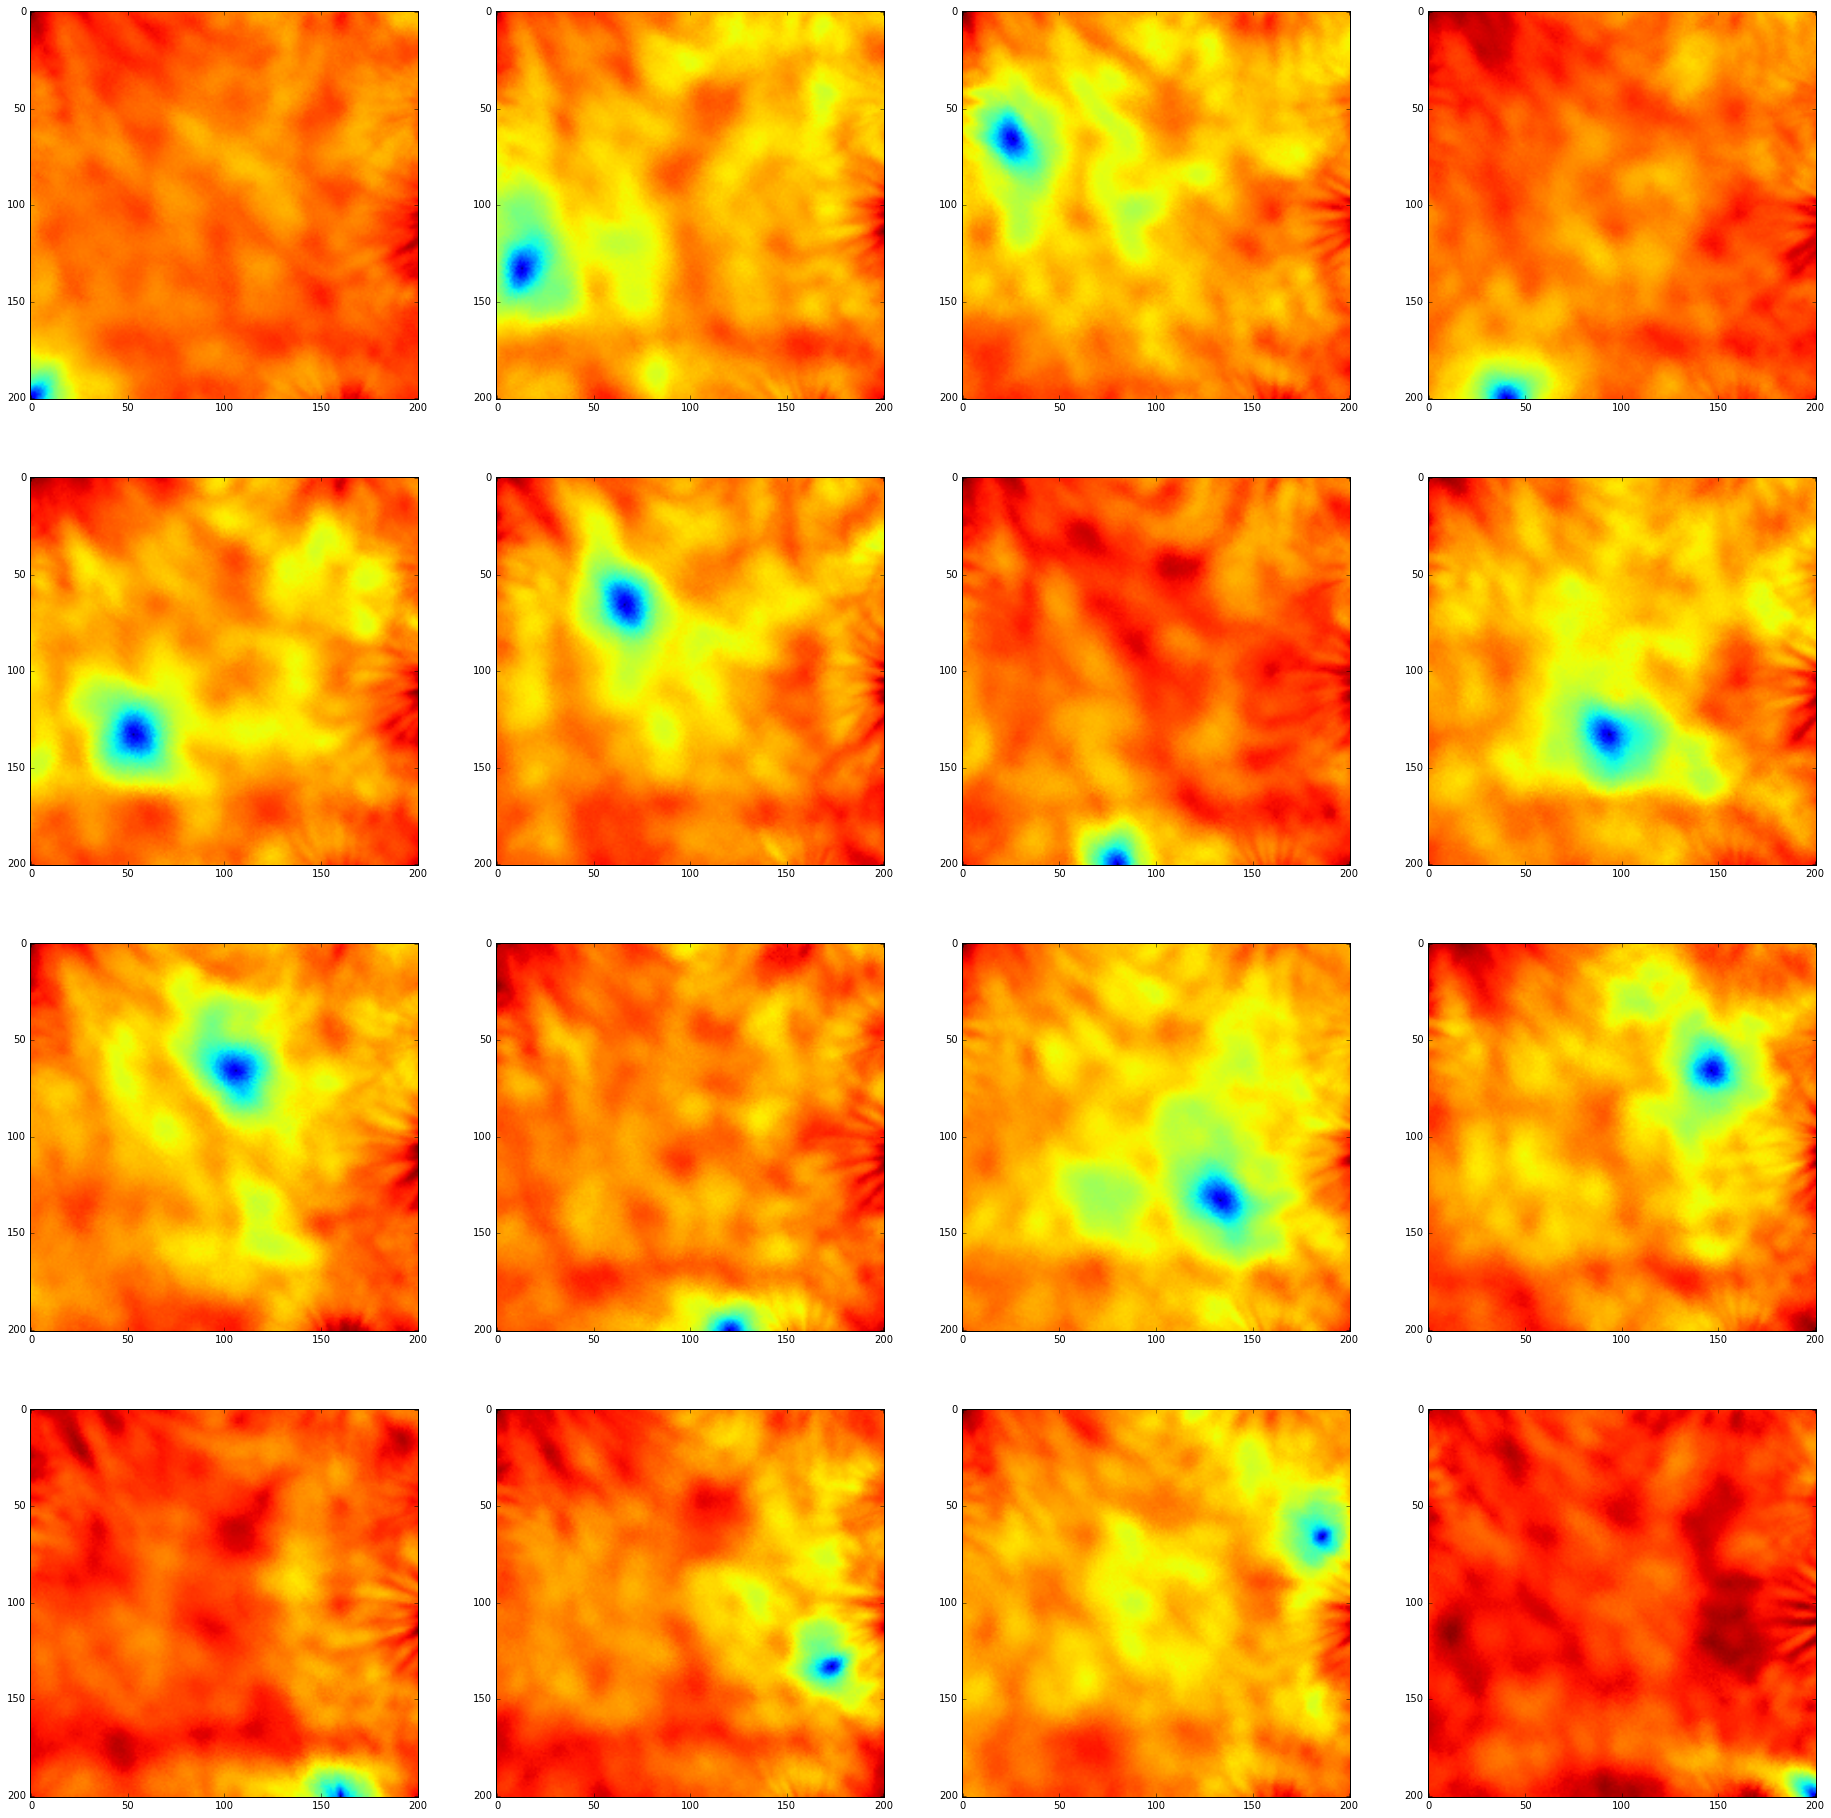

In [18]:
n = 16
ims_per_row = 201
idxs = np.linspace(0, ims_per_row*(ims_per_row-1), n, dtype='int')

Z = sp.spatial.distance.cdist(rotated_w_processed.processed.M[:,idxs].T, rotated_w_processed.processed.M.T, 'euclidean')

figsize = (32,32)
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for r in range(nrows):
    for c in range(ncols):
        M = np.rot90(Z[(r*ncols+c),:].reshape(ims_per_row, ims_per_row))
        axes[r][c].imshow(M, vmin=abs(M).min(), vmax=abs(M).max())

loading ../data/world_images/trees_hr_w/01.40x_18.60y_00.01z_0.00th_360fov.png


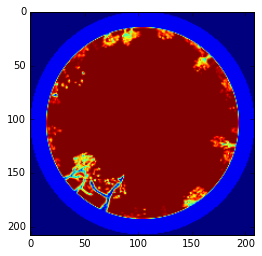

In [19]:
plt.imshow(ant_set_w[3000])

In [20]:
Z.shape

(16, 40401)

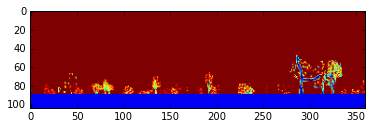

In [21]:
plt.imshow(ant_set[1000])

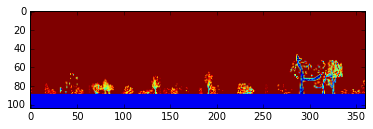

In [22]:
plt.imshow(ant_set[1002])

In [23]:
def manual_distance(I, image_set):
    """Compare an image to all other images using IDF"""
    
    I_tiled = np.tile(I, (len(image_set),1)).T
    abs_diff = np.abs(image_set.M - I_tiled)
    
    return np.sum(abs_diff, axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


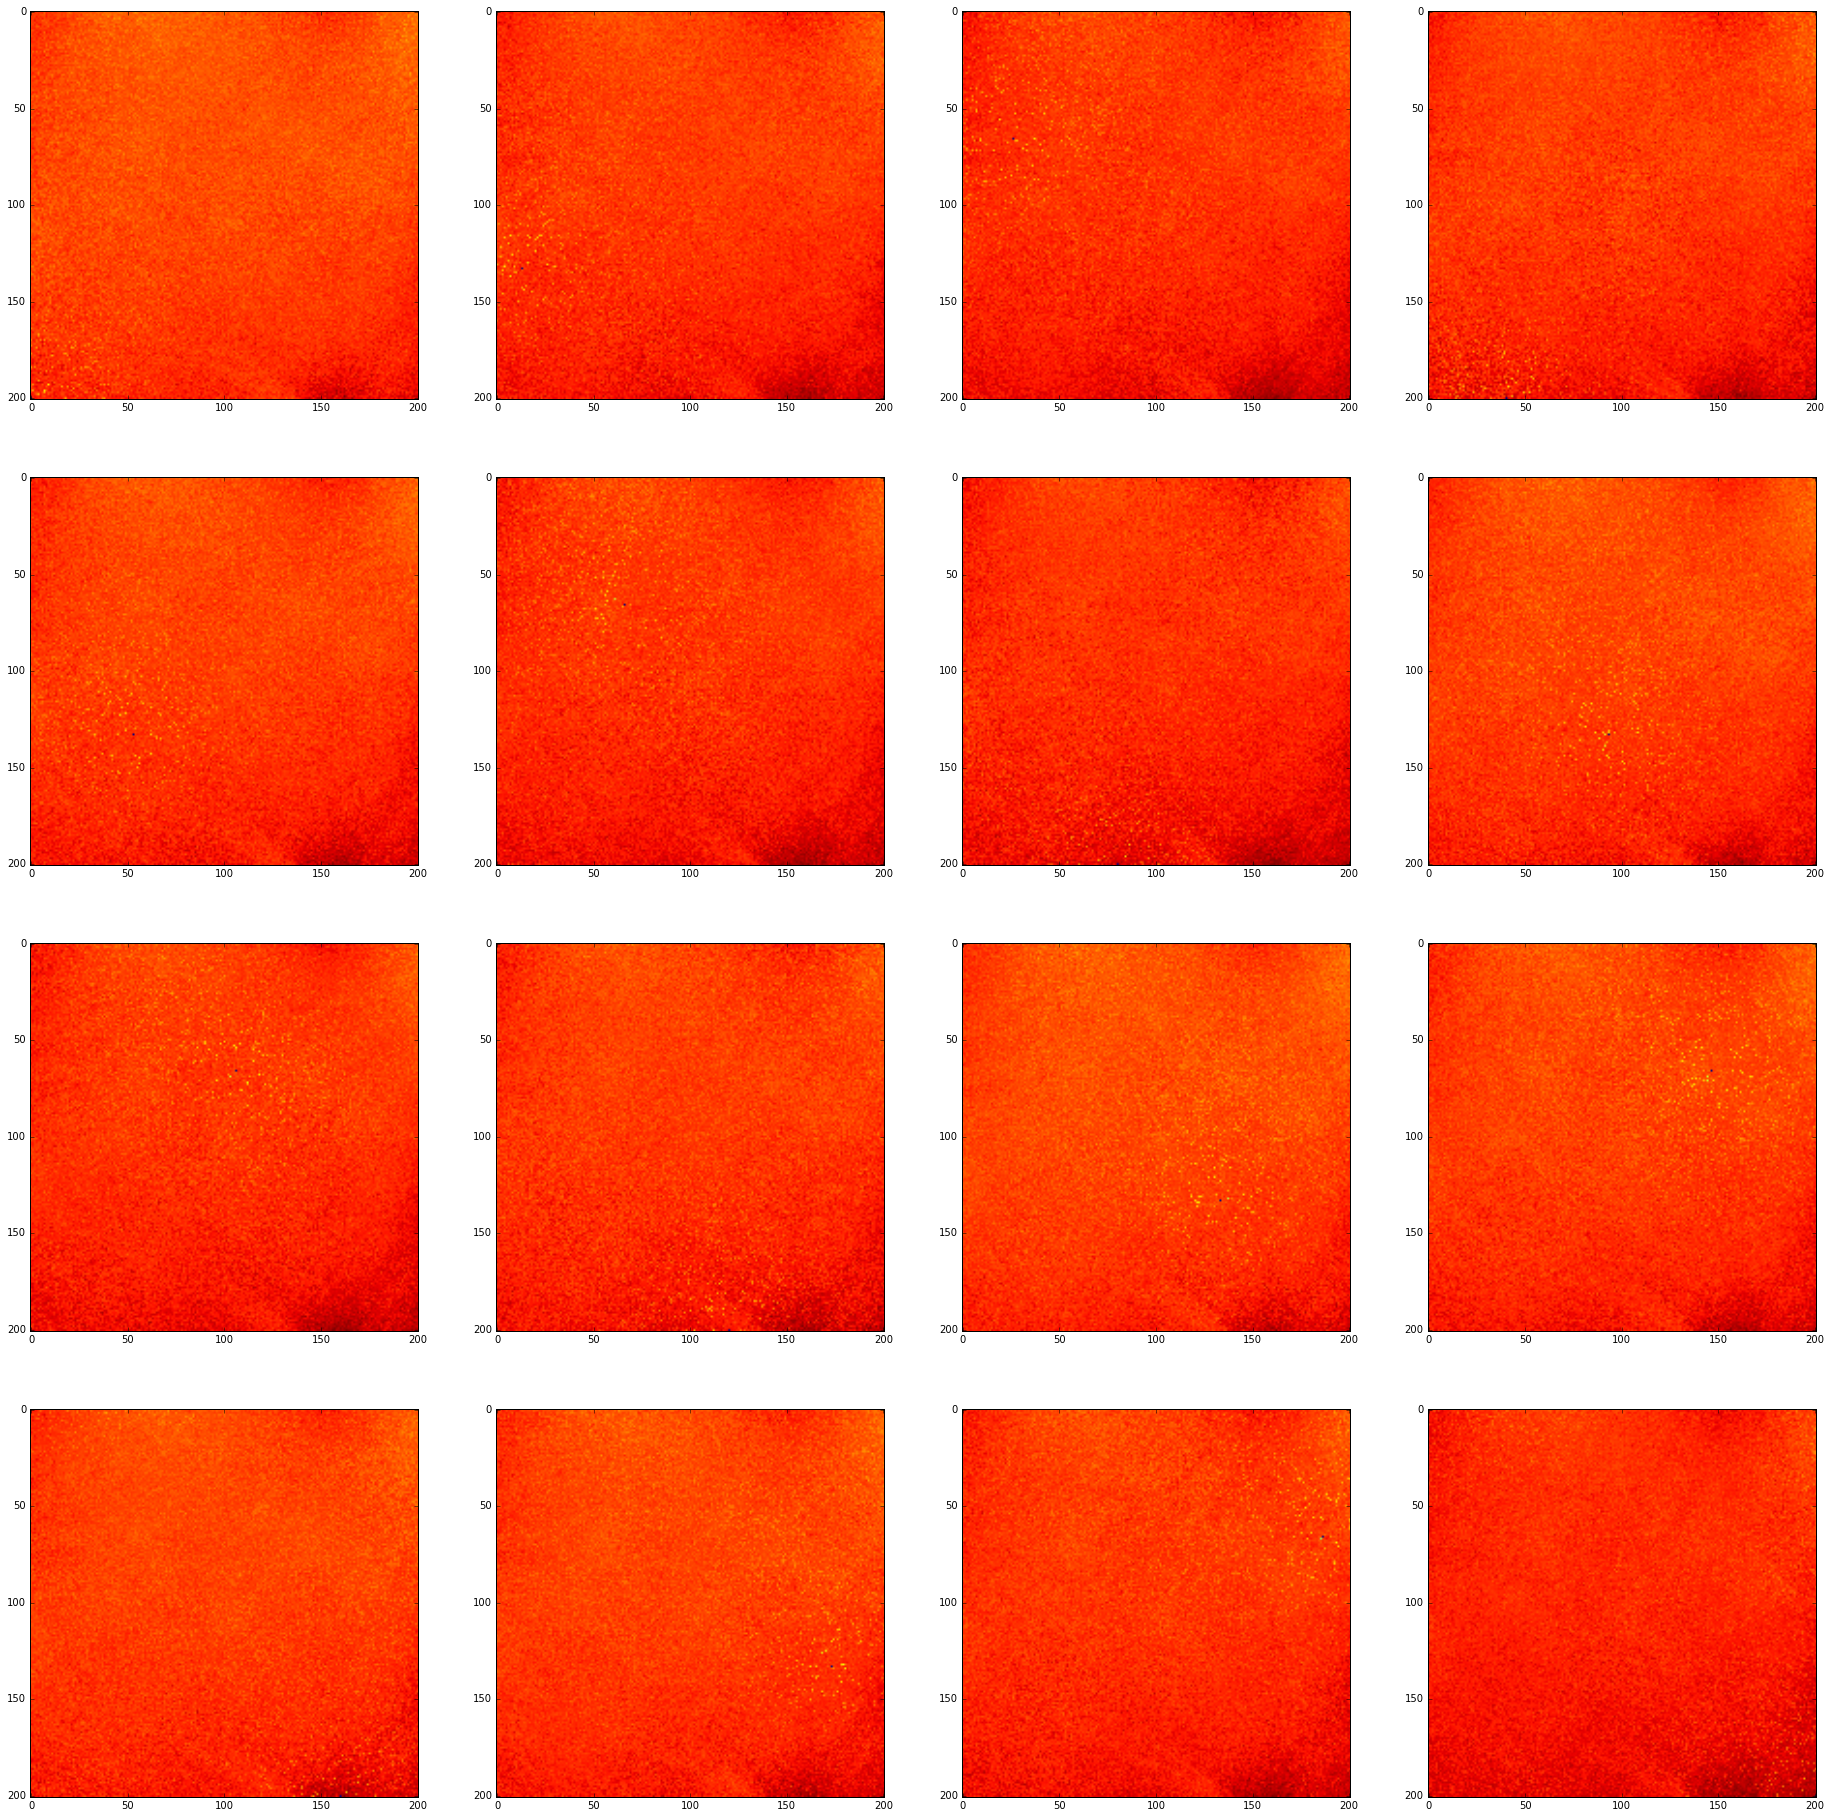

In [24]:
Z2 = np.zeros([n, len(rotated_set)])

for i, idx in enumerate(idxs):
    print i
    Z2[i] = manual_distance(rotated_set[idx].reshape(-1), rotated_set)

figsize = (32,32)
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for r in range(nrows):
    for c in range(ncols):
        M = np.rot90(Z2[(r*ncols+c),:].reshape(ims_per_row, ims_per_row))
        axes[r][c].imshow(M, vmin=abs(M).min(), vmax=abs(M).max())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


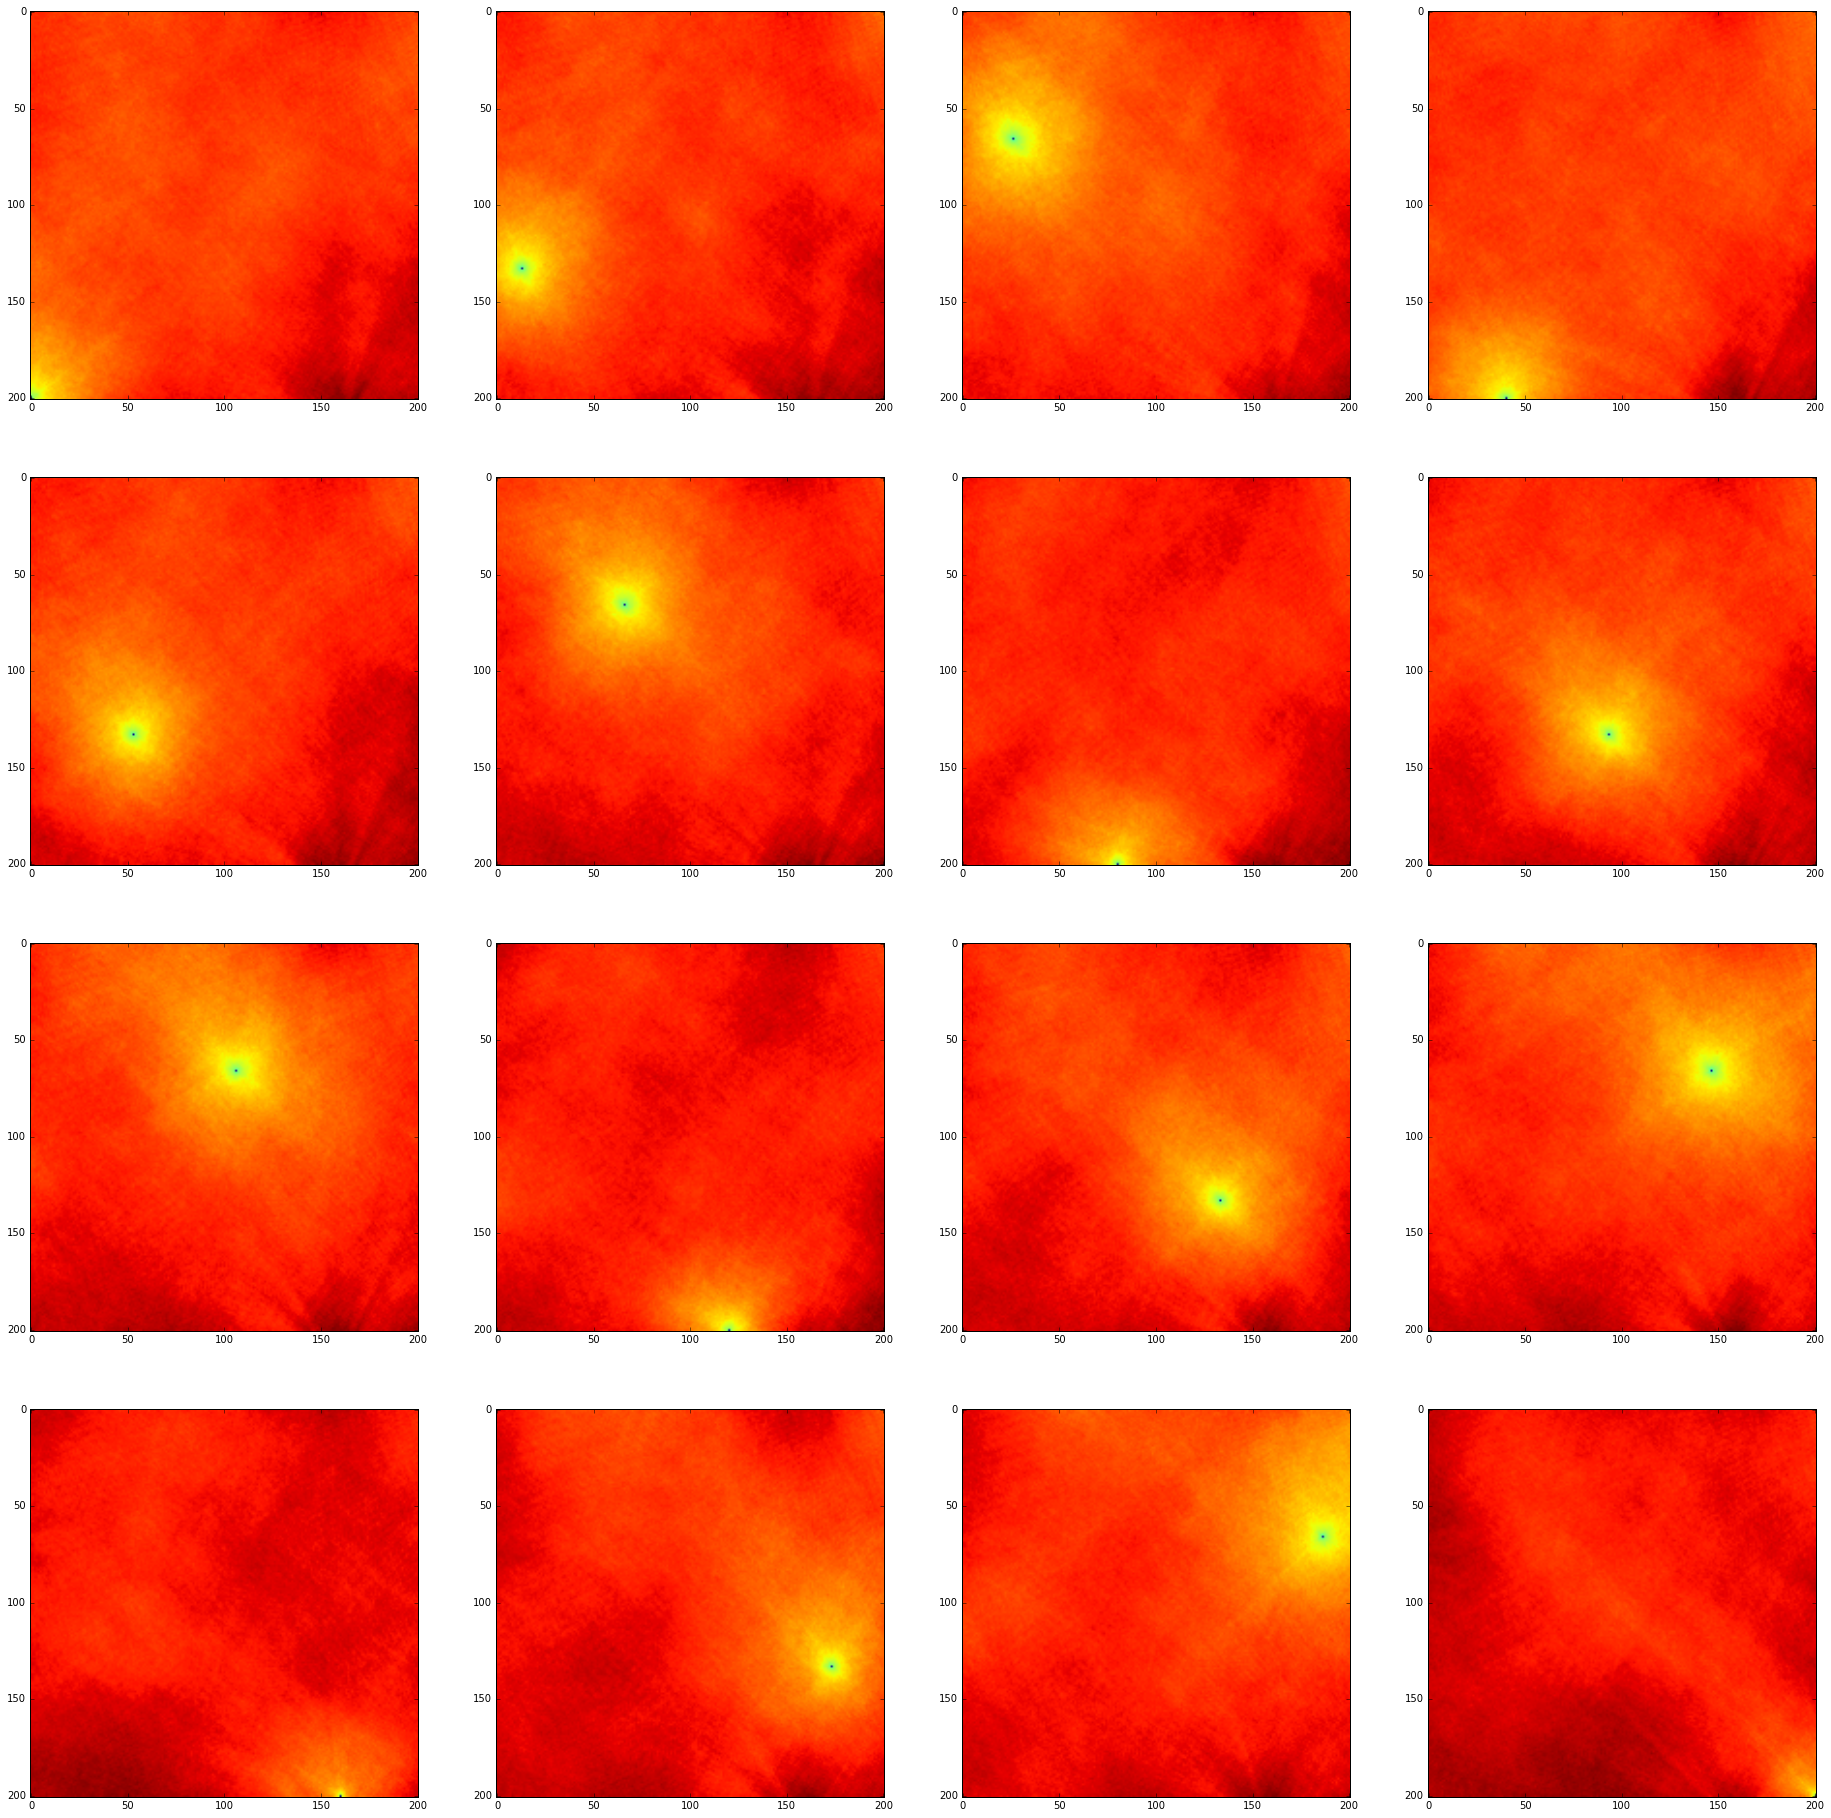

In [25]:
Z3 = np.zeros([n, len(rotated_set)])

for i, idx in enumerate(idxs):
    print i
    Z3[i] = manual_distance(ant_set[idx].reshape(-1), ant_set)

figsize = (32,32)
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for r in range(nrows):
    for c in range(ncols):
        M = np.rot90(Z3[(r*ncols+c),:].reshape(ims_per_row, ims_per_row))
        axes[r][c].imshow(M, vmin=abs(M).min(), vmax=abs(M).max())

In [ ]:
from scipy.misc import factorial as fac


def zernike_rad(m, n, rho):
    """
    Calculate the radial component of Zernike polynomial (m, n) 
    given a grid of radial coordinates rho.
    """
    
    #Todo: This could be sped up A LOT by caching all this factorial stuff
    
    if (n < 0 or m < 0 or abs(m) > n):
        raise ValueError
    
    if ((n - m) % 2):
        return rho*0.0
    
    pre_fac = lambda k: (-1.0) ** k * fac(n - k) / (fac(k) * fac((n + m) / 2.0 - k) * fac((n - m) / 2.0 - k))
    
    return np.sum(pre_fac(k) * rho**(n - 2.0 * k) for k in xrange((n - m) / 2 + 1)) * (rho <=1)

def zernike(m, n, rho, phi):
    """
    Calculate Zernike polynomial (m, n) given a grid of radial
    coordinates rho and azimuthal coordinates phi.
    """
    
    if (m > 0):
        Z = zernike_rad(m, n, rho) * np.cos(m * phi)
    elif (m < 0):
        Z = zernike_rad(-m, n, rho) * np.sin(m * phi)
    else:
        Z = zernike_rad(0, n, rho)
        
    return Z

In [ ]:
def create_z(degree, d):
    x_range = np.linspace (-1, 1, d)
    xx, yy = np.meshgrid(x_range, x_range)
    grid_rho = (xx**2 + yy**2) ** 0.5
    grid_phi = np.arctan2(xx, yy)   

    n_coeffs = zn.num_coeffs(degree)
    Z = np.zeros([d**2, n_coeffs])
    
    for j in range(n_coeffs):
        n, m = zn.noll_to_nm(j)
        Z[:,j] = zernike(m, n, grid_rho, grid_phi).reshape(-1)
        
    return Z

In [ ]:
degree = 40

my_Z = create_z(degree, 208)
plt.imshow(my_Z[:,5].reshape(208,208))
my_Z.shape

In [ ]:
def calc_coeffs(G, Z):
    
    j_max = Z.shape[1]
    m = np.zeros(n_coeffs)
    n = np.zeros(n_coeffs)

    for j in range(j_max):
        n[j], m[j] = zn.noll_to_nm(j)
        
    epsilon = np.ones(Z.shape[1])
    epsilon[m == 0] = 2.0
    
    return (2 * n + 2) / (epsilon * np.pi) * np.dot(Z.T, G.reshape(-1))# / np.sum(grid_mask) / 255.0

In [ ]:
coeffs = calc_coeffs(ant_set_w[3000], my_Z)

In [ ]:
def calc_coeff(G, Z, m, n):
    """Calculate a single coefficient"""
    epsilon = np.ones(Z.shape[1])
    if m == 0:
        epsilon = 2.0
    else:
        epsilon = 1.0
    return (2 * n + 2) / (epsilon * np.pi) * np.dot(Z.T, G.reshape(-1)) / np.sum(grid_mask) / 255.0



In [ ]:
def calc_magnitude(G, m, n):
    if m == 0:
        return calc_coeff(G, zernike(m, n, grid_rho, grid_phi), m, n)
    else:
        a = calc_coeff(G, zernike(-m, n, grid_rho, grid_phi), -m, n)
        b = calc_coeff(G, zernike(m, n, grid_rho, grid_phi), m, n)
        return np.linalg.norm([a, b])

In [ ]:
mags = zn.get_magnitudes(coeffs)
print mags

In [ ]:
G2 = rotated_w_set[3000]

coeffs2 = calc_coeffs(G2, my_Z)
mags2 = zn.get_magnitudes(coeffs2)

print mags2

In [28]:
TOTAL = np.dot(rotated_w_processed.processed.Z, rotated_w_processed[300])
plt.imshow(TOTAL.reshape(208,208))

AttributeError: 'ImgSet' object has no attribute 'Z'

In [ ]:
plt.imshow(ant_set_w[3000])

In [ ]:
plt.plot(mags)

In [ ]:
plt.plot(mags2)

In [ ]:
plt.plot((mags2 / mags2.std()) - (mags / mags.std()))

In [ ]:
plt.plot(ant_processed.processed[3000])

In [ ]:
plt.plot(rotated_w_processed.processed[3000])

In [ ]:
plt.plot(rotated_w_processed.processed[3000] / rotated_w_processed.processed[3000].std()
         - ant_processed.processed[3000] / ant_processed.processed[3000].std())

In [ ]:
a = calc_coeff(ant_set_w[3000], ZERN, -2, 2)

In [ ]:
b = calc_coeff(ant_set_w[3000], ZERN2, 2, 2)

In [ ]:
np.linalg.norm([a,b])

In [ ]:
plt.imshow(np.multiply(ZERN, ant_set_w[3000]))

In [ ]:
np.sum(np.multiply(ZERN, ant_set_w[3000]))

In [ ]:
plt.imshow(zernike(0, 0, grid_rho, grid_phi))

In [ ]:
m = np.zeros([30,1])

for i in range(30):
    n, m[i] = zn.noll_to_nm(i)
print m == 0

In [ ]:
zn.noll_to_nm(45)

In [ ]:
zn.noll_to_nm(45)